In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
def generate_time_series(t0="2020-01-01 00:00:00"):
    time = np.arange(50)
    values = np.where(time < 20, time**2, (time-5)**2)

    base = []
    for iteration in range(10):
        for y in range(50):
            base.append(values[y])
            
    base += np.random.randn(500)*100
    
    freq = "H"
    data_length = len(base)
    index = pd.date_range(start=t0, freq=freq, periods=data_length)
    ts = pd.Series(data=base, index=index)
    
    return {
        "freq": freq,
        "t0": t0,
        "length": len(ts),
        "data": ts
    }

In [3]:
time_series_data = generate_time_series()
time_series_data

{'freq': 'H',
 't0': '2020-01-01 00:00:00',
 'length': 500,
 'data': 2020-01-01 00:00:00      23.988535
 2020-01-01 01:00:00     -30.676209
 2020-01-01 02:00:00      90.003015
 2020-01-01 03:00:00     -57.712445
 2020-01-01 04:00:00     -22.221766
                           ...     
 2020-01-21 15:00:00    1745.258014
 2020-01-21 16:00:00    1729.837137
 2020-01-21 17:00:00    1868.686526
 2020-01-21 18:00:00    1850.154887
 2020-01-21 19:00:00    1953.937528
 Freq: H, Length: 500, dtype: float64}

In [6]:
time_series_data["data"]

2020-01-01 00:00:00      23.988535
2020-01-01 01:00:00     -30.676209
2020-01-01 02:00:00      90.003015
2020-01-01 03:00:00     -57.712445
2020-01-01 04:00:00     -22.221766
                          ...     
2020-01-21 15:00:00    1745.258014
2020-01-21 16:00:00    1729.837137
2020-01-21 17:00:00    1868.686526
2020-01-21 18:00:00    1850.154887
2020-01-21 19:00:00    1953.937528
Freq: H, Length: 500, dtype: float64

Text(0, 0.5, 'VALUE')

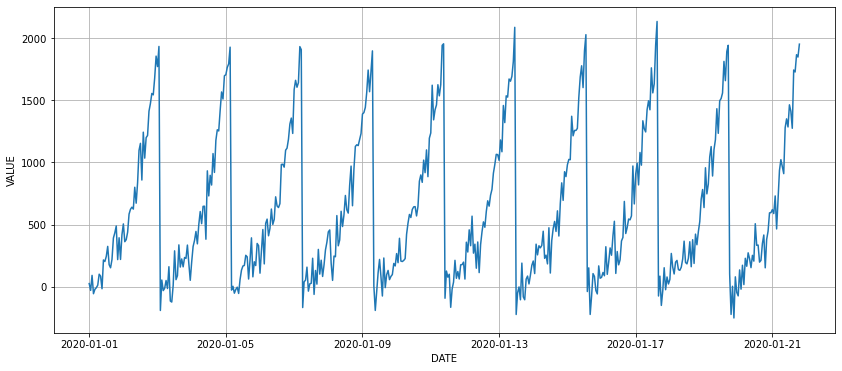

In [5]:
data = time_series_data["data"]
time = data.index
values = data

plt.figure(figsize=(14,6))
plt.plot(time, values)
plt.grid(True)
plt.xlabel("DATE")
plt.ylabel("VALUE")

In [7]:
!mkdir -p tmp

In [8]:
import json

def save_data_to_json(time_series_data, filename):
    tmp = {}

    tmp["freq"] = time_series_data["freq"]
    tmp["t0"] = time_series_data["t0"]
    tmp["length"] = time_series_data["length"]
    tmp["data"] = list(time_series_data["data"])
    
    with open(filename, 'w') as file:
        json.dump(tmp, file)

In [9]:
save_data_to_json(time_series_data, "tmp/all.json")

In [10]:
!head tmp/all.json

{"freq": "H", "t0": "2020-01-01 00:00:00", "length": 500, "data": [23.98853501218122, -30.676209151935296, 90.0030153056325, -57.71244460444761, -22.221766198307236, -9.56927138971843, 11.288781282165441, 99.54837073680153, 83.89499139329607, -17.74404022376038, 214.09454689578556, 201.6705951516786, 243.19071288555233, 323.7421163549171, 176.53352799316835, 151.33472032189178, 217.94782849478852, 391.13949013800925, 432.76160958603515, 488.342986296729, 217.15154175548685, 393.28239352293144, 218.54571702947908, 417.21176052879014, 504.92873236087974, 361.5314628162686, 378.0194767034043, 438.5664262160045, 584.2029752047589, 622.9052423280799, 639.8167920989599, 624.4476179767306, 800.4126885956675, 672.0044565120055, 838.260132030914, 1097.7863863320463, 1154.218895531706, 858.6260614384336, 1244.3984225652664, 1035.2151839347266, 1199.9643771023025, 1217.9420161629018, 1413.3555787467633, 1475.3186849488368, 1556.2750482639053, 1545.360231670099, 1680.9060460750482, 1857.4777463690